In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math
from matplotlib.colors import LogNorm

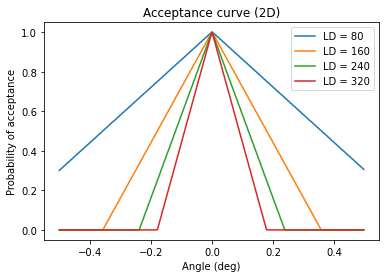

In [3]:
for iteration in range(4):
    # Declaration of constants
    D = 2.5
    L = 200 + 200*iteration

    #Declaration of variables
    theta_range = 0.5 #+- simmetrical limits
    number_of_points = 500 #sampling number from -D/2 to D/2
    number_of_angles = 500 # sampling number from -theta to +theta

    #Declaration of result array
    histogram_X = np.zeros(number_of_angles)
    histogram_Y = np.zeros(number_of_angles)

    #Calculation of the acceptance curve. Calculates the angular acceptance at every point in space. 
    for j in range(number_of_angles):
        angle = (theta_range*2*j/number_of_angles - theta_range)*2*math.pi / 360
        for i in range(number_of_points):
            position = D*i/number_of_points - D/2
            if -D/2 < L*np.tan(angle) + position < D/2:
                histogram_Y[j]+=1
        histogram_X[j]=angle*180/math.pi

    #Plot everything
    plt.plot(histogram_X,histogram_Y/np.max(histogram_Y),label="LD = "+str(int(L/D)))
plt.title("Acceptance curve (2D)")
plt.xlabel("Angle (deg)")
plt.ylabel("Probability of acceptance")
plt.legend()
plt.show()
plt.close()


In [4]:
def convert_angle (theta,phi):
    A = np.sqrt(1+np.tan(phi)**2)
    if math.pi/2 < phi <= 3*math.pi/2:
        ZX = - np.arctan(np.tan(theta)/A)
        ZY = - np.arctan(np.tan(theta)*np.tan(phi)/A)
    else:
        ZX = np.arctan(np.tan(theta)/A)
        ZY = np.arctan(np.tan(theta)*np.tan(phi)/A)
    return(ZX,ZY)

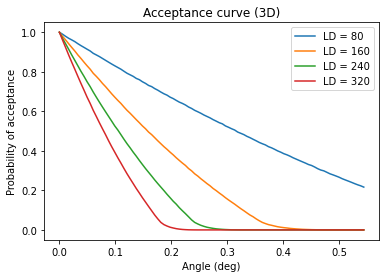

In [5]:
for iteration in range(4):
    # Declaration of constants
    D = 2.5
    L = 200 + 200*iteration
    Shape = "square"

    #Declaration of variables
    theta_range = 0.55 #+- simmetrical limits
    number_of_points = 100 #sampling number from -D/2 to D/2 both in X and Y
    number_of_angles = 100 # sampling number from -theta to +theta

    #Declaration of result array
    histogram_2X = np.zeros(number_of_angles)
    histogram_2Y = np.zeros(number_of_angles)

    histogram_XY = np.zeros([number_of_points,number_of_points])

    # x stands for the X coordinate
    # y stands for the Y coordinate
    # i stands for the theta angle
    # j stands for the phi angle

    for x in range(number_of_points):
        positionX = D*x/number_of_points - D/2
        for y in range(number_of_points):
            positionY = D*y/number_of_points - D/2
            for i in range(number_of_angles):
                theta = (theta_range*i/number_of_angles)*2*math.pi / 360
                for j in range(number_of_angles):
                    phi = j * 2 * math.pi / number_of_angles
                    ZX,ZY = convert_angle(theta,phi)
                    if -D/2 <= L*np.tan(ZX) + positionX <= D/2 and -D/2 <= L*np.tan(ZY) + positionY <= D/2:
                        histogram_2Y[i]+=1
                        histogram_XY[x][y] +=1
                histogram_2X[i]=theta*180/math.pi

    #Plot everything
    plt.plot(histogram_2X,histogram_2Y/np.max(histogram_2Y),label="LD = "+str(int(L/D)))
plt.title("Acceptance curve (3D)")
plt.xlabel("Angle (deg)")
plt.ylabel("Probability of acceptance")
plt.legend()
plt.show()
plt.close()

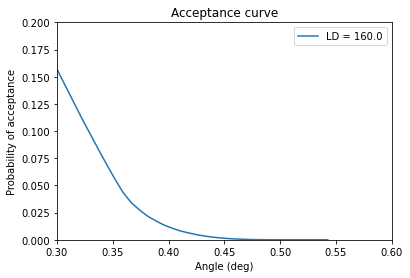

[657. 302.  55.   7.   0.   0.   0.   0.   0.   0.] [0.47666667 0.484      0.49133333 0.49866667 0.506      0.51333333
 0.52066667 0.528      0.53533333 0.54266667]


In [58]:
plt.plot(histogram_2X,histogram_2Y/np.max(histogram_2Y),label="LD = "+str(L/D))
plt.title("Acceptance curve")
plt.xlabel("Angle (deg)")
plt.ylabel("Probability of acceptance")
plt.xlim(0.3,0.6)
plt.ylim(0,0.2)
plt.legend()
plt.show()
plt.close()
print(histogram_2Y[140:],histogram_2X[140:])

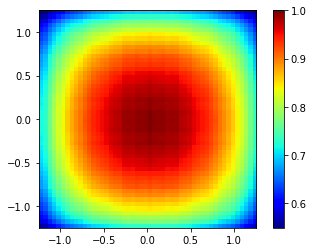

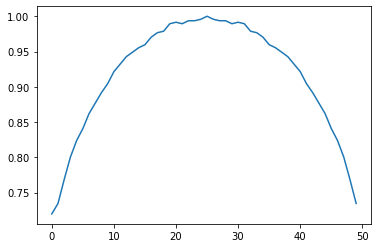

In [70]:
plt.imshow(histogram_XY/np.max(histogram_XY),extent=[-1.25,1.25,-1.25,1.25],cmap="jet")
plt.colorbar()
plt.show()
plt.close()
plt.plot(histogram_XY[25]/np.max(histogram_XY[25]))
plt.show()
plt.close()

In [93]:
# Declaration of constants
D = 2.5
L = 400
Shape = "square"

#Declaration of variables
theta_range = 0.55 #+- simmetrical limits
number_of_points = 150 #sampling number from -D/2 to D/2 both in X and Y
number_of_angles = 150 # sampling number from -theta to +theta

#Declaration of result array
histogram_thetaX = []
histogram_thetaY = []

histogram_XY = np.zeros([number_of_points,number_of_points])

# x stands for the X coordinate
# y stands for the Y coordinate
# i stands for the theta angle
# j stands for the phi angle

for x in range(number_of_points):
    positionX = D*x/number_of_points - D/2
    for y in range(number_of_points):
        positionY = D*y/number_of_points - D/2
        for i in range(number_of_angles):
            theta = (theta_range*i/number_of_angles)*2*math.pi / 360
            for j in range(number_of_angles):
                phi = j * 2 * math.pi / number_of_angles
                ZX,ZY = convert_angle(theta,phi)
                if -D/2 <= L*np.tan(ZX) + positionX <= D/2 and -D/2 <= L*np.tan(ZY) + positionY <= D/2:
                    histogram_thetaX.append(ZX*360/(2*math.pi))
                    histogram_thetaY.append(ZY*360/(2*math.pi))

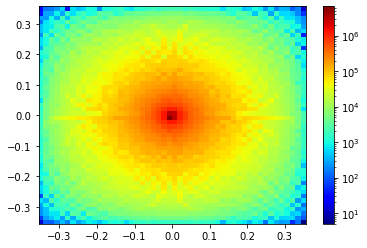

In [104]:
plt.hist2d(histogram_thetaX,histogram_thetaY,bins=50,cmap="jet",norm=LogNorm())
plt.colorbar()
plt.show()
plt.close()

In [97]:
acceptance2D = histogram_2Y/np.max(histogram_2Y)
acceptance2D_X = histogram_2X

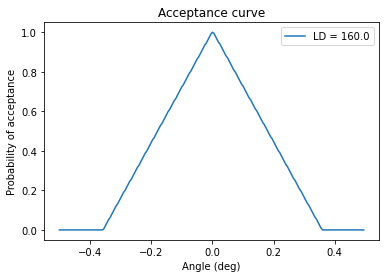

In [106]:
# Declaration of constants
D = 2.5
L = 400

#Declaration of variables
theta_range = 0.5 #+- simmetrical limits
number_of_points = 200 #sampling number from -D/2 to D/2
number_of_angles = 200 # sampling number from -theta to +theta

#Declaration of result array
histogram_X = np.zeros(number_of_angles)
histogram_Y = np.zeros(number_of_angles)

#Calculation of the acceptance curve. Calculates the angular acceptance at every point in space. 
for j in range(number_of_angles):
    angle = (theta_range*2*j/number_of_angles - theta_range)*2*math.pi / 360
    for i in range(number_of_points):
        position = D*i/number_of_points - D/2
        if -D/2 < L*np.tan(angle) + position < D/2:
            histogram_Y[j]+=1
    histogram_X[j]=angle*180/math.pi

#Plot everything
plt.plot(histogram_X,histogram_Y/np.max(histogram_Y),label="LD = "+str(L/D))
plt.title("Acceptance curve")
plt.xlabel("Angle (deg)")
plt.ylabel("Probability of acceptance")
plt.legend()
plt.show()
plt.close()



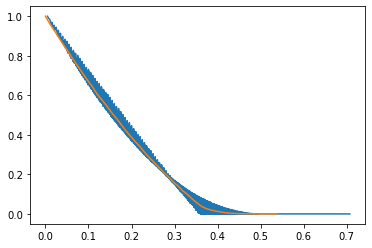

In [181]:
combo_X = []
combo_Y = []
e = 0
for x in range(len(histogram_X)):
    for y in range(len(histogram_X)-e):
        a = np.sqrt(histogram_X[x]**2+histogram_X[y]**2)
        b = histogram_Y[x]*histogram_Y[y]
        if a not in combo_X:
            for i in range(len(combo_X)):
                if combo_X[i] > a:
                    index = i
                    break
            combo_X = combo_X[: i] + [a] + combo_X[i :]
            combo_Y = combo_Y[: i] + [b] + combo_Y[i :]
    e+=1
combined = np.array([combo_X,combo_Y])
#combined = combined[combined[:,-1].argsort()]
plt.plot(combined[0],combined[1]/np.max(combined[1]))
plt.plot(histogram_2X,histogram_2Y/np.max(histogram_2Y))
plt.show()
plt.close()

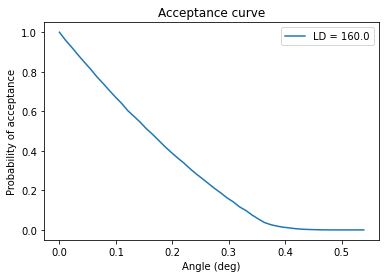

In [108]:
# Declaration of constants
D = 2.5
L = 400
Shape = "square"

#Declaration of variables
theta_range = 0.55 #+- simmetrical limits
number_of_points = 50 #sampling number from -D/2 to D/2 both in X and Y
number_of_angles = 50 # sampling number from -theta to +theta

#Declaration of result array
histogram_2X = np.zeros(number_of_angles)
histogram_2Y = np.zeros(number_of_angles)

histogram_XY = np.zeros([number_of_points,number_of_points])

# x stands for the X coordinate
# y stands for the Y coordinate
# i stands for the theta angle
# j stands for the phi angle

for x in range(number_of_points):
    positionX = D*x/number_of_points - D/2
    for y in range(number_of_points):
        positionY = D*y/number_of_points - D/2
        for i in range(number_of_angles):
            theta = (theta_range*i/number_of_angles)*2*math.pi / 360
            for j in range(number_of_angles):
                phi = j * 2 * math.pi / number_of_angles
                ZX,ZY = convert_angle(theta,phi)
                if -D/2 <= L*np.tan(ZX) + positionX <= D/2 and -D/2 <= L*np.tan(ZY) + positionY <= D/2:
                    histogram_2Y[i]+=1
                    histogram_XY[x][y] +=1
            histogram_2X[i]=theta*180/math.pi

#Plot everything
plt.plot(histogram_2X,histogram_2Y/np.max(histogram_2Y),label="LD = "+str(L/D))
plt.title("Acceptance curve")
plt.xlabel("Angle (deg)")
plt.ylabel("Probability of acceptance")
plt.legend()
plt.show()
plt.close()

In [164]:
print(combined[0][1:20])
print(combined[1][1:20]/np.max(combined[1][1:20]))
print(len(combined[0]),len(combined[1]))
print(5106/2)

[0.00707107 0.01       0.01118034 0.01414214 0.015      0.01581139
 0.01802776 0.02       0.02061553 0.0212132  0.02236068 0.025
 0.0254951  0.02692582 0.02828427 0.02915476 0.03       0.03041381
 0.03162278]
[1.         0.99476925 0.98477157 0.96977505 0.97938622 0.96954315
 0.95477853 0.9640032  0.95431472 0.94001391 0.93978201 0.95374784
 0.94416244 0.92978433 0.91071659 0.91540622 0.93836481 0.92893401
 0.91478781]
5107 5107
2553.0


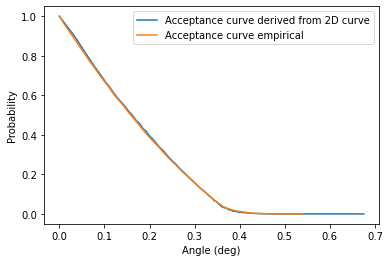

In [188]:
div_step = 50
averaged_X = [0]
averaged_Y = [combined[1][0]]
i=0
while div_step*(i+1) < len(combined[0]):
    averaged_X.append(np.average(combined[0][div_step*i:div_step*(i+1)]))
    averaged_Y.append(np.average(combined[1][div_step*i:div_step*(i+1)]))
    i+=1
plt.plot(averaged_X,averaged_Y/np.max(averaged_Y),label="Acceptance curve derived from 2D curve")
plt.plot(histogram_2X,histogram_2Y/np.max(histogram_2Y),label="Acceptance curve empirical")
plt.legend()
plt.xlabel("Angle (deg)")
plt.ylabel("Probability")
plt.show()
plt.close()

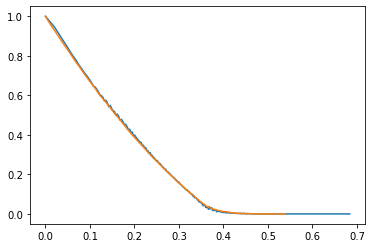

In [183]:
plt.plot(averaged_X,averaged_Y/np.max(averaged_Y))
plt.plot(histogram_2X,histogram_2Y/np.max(histogram_2Y))
plt.show()
plt.close()

In [185]:
print(len(averaged_X))

205
